In [72]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree



In [73]:
# Read in CSV file
perth_houses_df = pd.read_csv("Resources/all_perth_310121.csv")

# Review the DataFrame
perth_houses_df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


### Data PreProcessing and Cleaning

In [74]:
perth_houses_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637072.005794,355825.632737,51000.000000,410000.000000,535500.000000,760000.000000,2.440000e+06
BEDROOMS,33656.0,3.659110,0.752038,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,33656.0,1.823063,0.587427,1.000000,1.000000,2.000000,2.000000,1.600000e+01
GARAGE,31178.0,2.199917,1.365225,1.000000,2.000000,2.000000,2.000000,9.900000e+01
LAND_AREA,33656.0,2740.644016,16693.513215,61.000000,503.000000,682.000000,838.000000,9.999990e+05
FLOOR_AREA,33656.0,183.501545,72.102982,1.000000,130.000000,172.000000,222.250000,8.700000e+02
BUILD_YEAR,30501.0,1989.706436,20.964330,1868.000000,1978.000000,1995.000000,2005.000000,2.017000e+03
CBD_DIST,33656.0,19777.374465,11364.415413,681.000000,11200.000000,17500.000000,26600.000000,5.980000e+04
NEAREST_STN_DIST,33656.0,4523.371494,4495.064024,46.000000,1800.000000,3200.000000,5300.000000,3.550000e+04
POSTCODE,33656.0,6089.420074,62.167921,6003.000000,6050.000000,6069.000000,6150.000000,6.558000e+03


In [75]:
#find the datatypes
perth_houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [76]:
#find null values of any of the columns
perth_houses_df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [77]:
# change GARAGE 'NULL' to figure of 0 (assume there are no garages for these houses) 
perth_houses_df['GARAGE'] = perth_houses_df['GARAGE'].fillna(0)

# Set BUILD_YEAR to the median 
perth_houses_df['BUILD_YEAR'] = perth_houses_df['BUILD_YEAR'].fillna(perth_houses_df['BUILD_YEAR'].median())
perth_houses_df.tail(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,1995.0,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,1995.0,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN
33655,9E Margaret Street,Midland,295000,3,1,2.0,296,95,1995.0,16700,Midland Station,1700,05-2016\r,6056,-31.882163,116.014755,LA SALLE COLLEGE,1.055564,53.0


In [78]:
#change garage and build_year columns from float to integer
perth_houses_df['GARAGE'] = perth_houses_df['GARAGE'].astype(int)
perth_houses_df['BUILD_YEAR'] = perth_houses_df['BUILD_YEAR'].astype(int)
perth_houses_df.tail()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33651,9C Gold Street,South Fremantle,1040000,4,3,2,292,245,2013,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2,228,114,1995,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2,261,112,1995,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2,457,85,1974,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN
33655,9E Margaret Street,Midland,295000,3,1,2,296,95,1995,16700,Midland Station,1700,05-2016\r,6056,-31.882163,116.014755,LA SALLE COLLEGE,1.055564,53.0


In [79]:
#check breakdown of number of garages per house
perth_houses_df["GARAGE"].value_counts()

2     20724
1      5290
0      2478
3      2042
4      1949
6       466
5       362
8       129
7        97
12       30
10       26
9        17
14       13
13        8
11        7
16        4
18        3
20        3
26        1
17        1
50        1
99        1
21        1
22        1
32        1
31        1
Name: GARAGE, dtype: int64

In [80]:
# remove all Garage values of <2
# value_counts = perth_houses_df['GARAGE'].value_counts()
# filter_classification = value_counts[value_counts >1]
# print(filter_classification)

In [81]:
#check breakdown of number of bedrooms per house
perth_houses_df["BEDROOMS"].value_counts()


4     17635
3     11617
5      2476
2      1457
6       296
1        95
7        53
8        21
9         4
10        2
Name: BEDROOMS, dtype: int64

In [82]:
#check breakdown of number of bathrooms per house
perth_houses_df["BATHROOMS"].value_counts()


2     22264
1      8839
3      2284
4       229
5        30
6         7
7         2
16        1
Name: BATHROOMS, dtype: int64

In [83]:
# Set DATE_SOLD to datetime
perth_houses_df['DATE_SOLD'] = pd.to_datetime(perth_houses_df['DATE_SOLD'], format='%m-%Y\r')

# Split DATE_SOLD into MONTH and DATE columna
perth_houses_df['MONTH_SOLD'] = perth_houses_df['DATE_SOLD'].dt.month
perth_houses_df['YEAR_SOLD'] = perth_houses_df['DATE_SOLD'].dt.year
perth_houses_df.head()


,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,...,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,MONTH_SOLD,YEAR_SOLD
0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2003,18300,...,1800,2018-09-01,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,9,2018
1,1 Addis Way,Wandi,365000,3,2,2,351,139,2013,26900,...,4900,2019-02-01,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0,2,2019
2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979,22600,...,1900,2015-06-01,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,6,2015
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953,17900,...,3600,2018-07-01,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,7,2018
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998,11200,...,2000,2016-11-01,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,11,2016


In [84]:
#drop columns not required for ML 
perth_houses_cleaned_df = perth_houses_df.drop(['ADDRESS','CBD_DIST','NEAREST_STN_DIST','POSTCODE','DATE_SOLD','LATITUDE','LONGITUDE','NEAREST_SCH_DIST','NEAREST_SCH_RANK'], axis=1)
perth_houses_cleaned_df.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,NEAREST_STN,NEAREST_SCH,MONTH_SOLD,YEAR_SOLD
0,South Lake,565000,4,2,2,600,160,2003,Cockburn Central Station,LAKELAND SENIOR HIGH SCHOOL,9,2018
1,Wandi,365000,3,2,2,351,139,2013,Kwinana Station,ATWELL COLLEGE,2,2019
2,Camillo,287000,3,1,1,719,86,1979,Challis Station,KELMSCOTT SENIOR HIGH SCHOOL,6,2015
3,Bellevue,255000,2,1,2,651,59,1953,Midland Station,SWAN VIEW SENIOR HIGH SCHOOL,7,2018
4,Lockridge,325000,4,1,2,466,131,1998,Bassendean Station,KIARA COLLEGE,11,2016


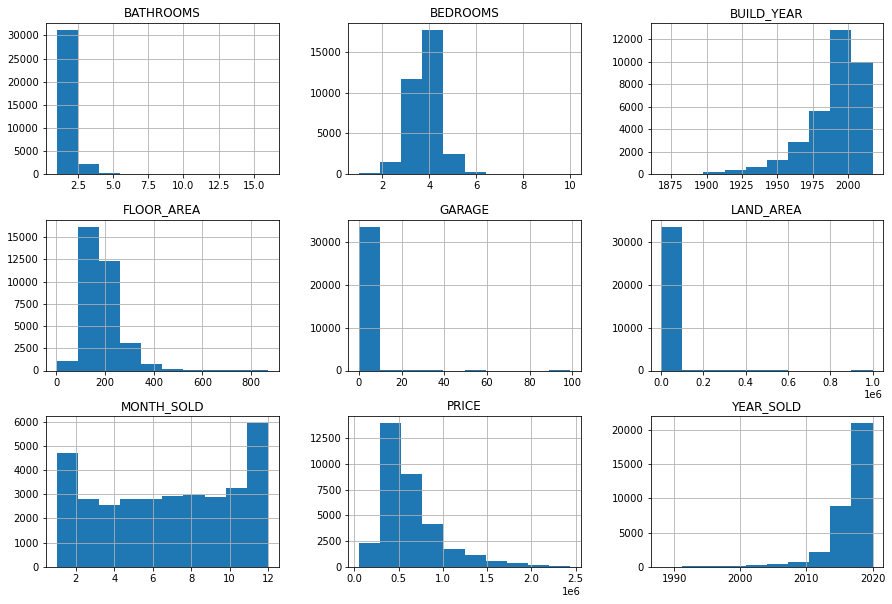

In [85]:
# show histogram for all columns
perth_houses_cleaned_df.hist(figsize= (15,10))
plt.savefig("images/Cleaned_Histogram.png")

In [86]:
perth_houses_cleaned_df.isnull().sum()

SUBURB         0
PRICE          0
BEDROOMS       0
BATHROOMS      0
GARAGE         0
LAND_AREA      0
FLOOR_AREA     0
BUILD_YEAR     0
NEAREST_STN    0
NEAREST_SCH    0
MONTH_SOLD     0
YEAR_SOLD      0
dtype: int64

In [87]:
perth_houses_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SUBURB       33656 non-null  object
 1   PRICE        33656 non-null  int64 
 2   BEDROOMS     33656 non-null  int64 
 3   BATHROOMS    33656 non-null  int64 
 4   GARAGE       33656 non-null  int32 
 5   LAND_AREA    33656 non-null  int64 
 6   FLOOR_AREA   33656 non-null  int64 
 7   BUILD_YEAR   33656 non-null  int32 
 8   NEAREST_STN  33656 non-null  object
 9   NEAREST_SCH  33656 non-null  object
 10  MONTH_SOLD   33656 non-null  int64 
 11  YEAR_SOLD    33656 non-null  int64 
dtypes: int32(2), int64(7), object(3)
memory usage: 2.8+ MB


In [88]:
for column in ['SUBURB','NEAREST_STN','NEAREST_SCH']:
    dummies= pd.get_dummies(perth_houses_cleaned_df[column], prefix= column)
    perth_houses_cleaned_df= pd.concat([perth_houses_cleaned_df, dummies], axis=1)
    perth_houses_cleaned_df= perth_houses_cleaned_df.drop(column, axis=1)

perth_houses_cleaned_df.head()    


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,MONTH_SOLD,YEAR_SOLD,SUBURB_Alexander Heights,...,NEAREST_SCH_TRINITY COLLEGE,NEAREST_SCH_URSULA FRAYNE CATHOLIC COLLEGE,NEAREST_SCH_WANNEROO SECONDARY COLLEGE,NEAREST_SCH_WARNBRO COMMUNITY HIGH SCHOOL,NEAREST_SCH_WARWICK SENIOR HIGH SCHOOL,NEAREST_SCH_WESLEY COLLEGE,NEAREST_SCH_WILLETTON SENIOR HIGH SCHOOL,NEAREST_SCH_WOODVALE SECONDARY COLLEGE,NEAREST_SCH_YANCHEP SECONDARY COLLEGE,NEAREST_SCH_YOUTH FUTURES COMMUNITY SCHOOL
0,565000,4,2,2,600,160,2003,9,2018,0,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,2,351,139,2013,2,2019,0,...,0,0,0,0,0,0,0,0,0,0
2,287000,3,1,1,719,86,1979,6,2015,0,...,0,0,0,0,0,0,0,0,0,0
3,255000,2,1,2,651,59,1953,7,2018,0,...,0,0,0,0,0,0,0,0,0,0
4,325000,4,1,2,466,131,1998,11,2016,0,...,0,0,0,0,0,0,0,0,0,0


### Split Data into Training and Test Sets

In [89]:
# Separate the y variable, the labels
y = perth_houses_cleaned_df["PRICE"]

# Separate the X variable, the features
X = perth_houses_cleaned_df.drop(columns="PRICE")

In [90]:
# Review the y variable Series
y[:5]

0    565000
1    365000
2    287000
3    255000
4    325000
Name: PRICE, dtype: int64

In [91]:
# Review the X variable DataFrame
X[:5]

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,MONTH_SOLD,YEAR_SOLD,SUBURB_Alexander Heights,SUBURB_Alfred Cove,...,NEAREST_SCH_TRINITY COLLEGE,NEAREST_SCH_URSULA FRAYNE CATHOLIC COLLEGE,NEAREST_SCH_WANNEROO SECONDARY COLLEGE,NEAREST_SCH_WARNBRO COMMUNITY HIGH SCHOOL,NEAREST_SCH_WARWICK SENIOR HIGH SCHOOL,NEAREST_SCH_WESLEY COLLEGE,NEAREST_SCH_WILLETTON SENIOR HIGH SCHOOL,NEAREST_SCH_WOODVALE SECONDARY COLLEGE,NEAREST_SCH_YANCHEP SECONDARY COLLEGE,NEAREST_SCH_YOUTH FUTURES COMMUNITY SCHOOL
0,4,2,2,600,160,2003,9,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2,2,351,139,2013,2,2019,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,719,86,1979,6,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,2,651,59,1953,7,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,2,466,131,1998,11,2016,0,0,...,0,0,0,0,0,0,0,0,0,0


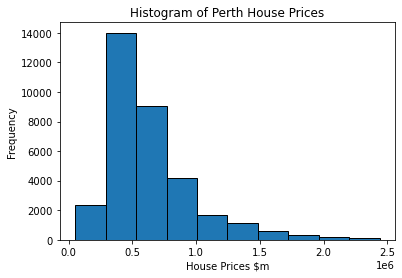

In [92]:
# create a histogram for the y values
plt.hist(y, bins=10, edgecolor='black')
plt.xlabel('House Prices $m')
plt.ylabel('Frequency')
plt.title('Histogram of Perth House Prices')
plt.savefig("images/Perth_House_Prices_Histogram.png")
plt.show()



### Split Data into Training and Test Datasets

In [93]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape   

(25242, 557)

### Create a Linear Regression Model with the Cleaned Data

In [94]:
# Instantiate the Logistic Regression model
linear_regression_model = LinearRegression()

# fit the model using the training data
linear_regression_model.fit(X_train, y_train)

# Use the Test data to make a prediction
lr_predict = linear_regression_model.predict(X_test)
lr_predict

array([ 361375.91188483,  793888.90126911,  547208.86474172, ...,
       1282658.23144034,  441738.11636704, 1004684.77851868])

In [95]:
 # Score the model
print(f"Training Data Score: {linear_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {linear_regression_model.score(X_test, y_test)}")

Training Data Score: 0.7831957127521925
Testing Data Score: 0.7726938792151263


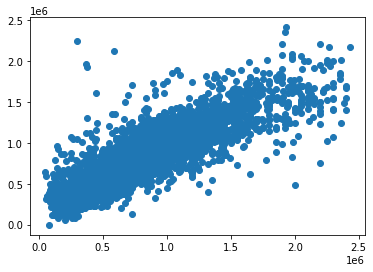

In [96]:
# Create a scatter plot 
plt.scatter(y_test, lr_predict)
plt.savefig("Images/ScatterPlot.png")


### Model 2: Decision Tree

In [97]:
# Create Standard Scaler
scaler= StandardScaler()

# Fit Standard Scaler
X_scaler= scaler.fit(X_train)

# Scale Data
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [98]:
# Fit the Decision Tree

# Create the Decision Tree classifier
model= tree.DecisionTreeClassifier()

# Fit the model
model= model.fit(X_train_scaled, y_train)

In [99]:
# Make Predictions using the Tree Model
tree_predict= model.predict(X_test_scaled)

In [100]:
# Calculate the confusion matrix
con_max= confusion_matrix(y_test, tree_predict)
con_max_df= pd.DataFrame(con_max, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

#Calculate the Accuracy Score
acc_score= accuracy_score(y_test, tree_predict)


ValueError: Shape of passed values is (1585, 1585), indices imply (2, 2)

In [ ]:
# Display Results
print("Confusion Matrix")
display(con_max_df)
print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, tree_predict))